In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

In [ ]:
(x_train,y_train) , (x_test,y_test) = tf.keras.datasets.cifar10.load_data()
x_train,x_test = x_train/255.0,x_test/255.0
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
model = models.Sequential([
    layers.Conv2D(32,(3,3) , activation = 'relu' , input_shape = (32 ,32 ,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3) ,activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3) ,activation='relu'),

    layers.Flatten(),

    layers.Dropout(0.3),
    layers.Dense(64 ,activation='relu'),
    layers.Dense(10 ,activation = 'softmax')
])

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True
)
train_generator = train_datagen.flow(x_train,y_train,batch_size = 64)
model.compile(
  optimizer = 'adam',
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy']
)


In [ ]:
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = (x_test,y_test),
    batch_size = 64
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 77ms/step - accuracy: 0.2855 - loss: 1.9084 - val_accuracy: 0.4760 - val_loss: 1.4394
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.4634 - loss: 1.4719 - val_accuracy: 0.5586 - val_loss: 1.2141
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.5198 - loss: 1.3371 - val_accuracy: 0.5820 - val_loss: 1.1733
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.5567 - loss: 1.2454 - val_accuracy: 0.6160 - val_loss: 1.0655
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.5760 - loss: 1.1866 - val_accuracy: 0.6054 - val_loss: 1.1217
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 70ms/step - accuracy: 0.6006 - loss: 1.1294 - val_accuracy: 0.6356 - val_loss: 1.0542
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.6126 - loss: 1.0945 - val_accuracy: 0.6610 - val_loss: 0.9879
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.6268 - loss: 1.0568 - val_accurac

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")

313/313 - 3s - 9ms/step - accuracy: 0.6885 - loss: 0.8956

Test accuracy: 0.69


In [ ]:
model.save("my_cnn_model.keras")

import shutil
shutil.make_archive("my_cnn_model", 'zip', '.', 'my_cnn_model.keras')

from google.colab import files
files.download("my_cnn_model.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Accuracy')

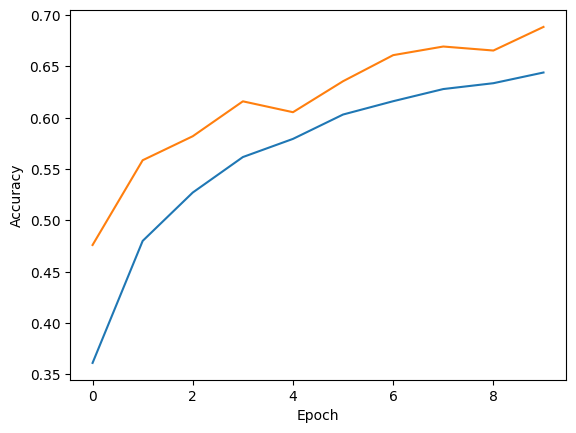

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


In [ ]:
def predict(path):
  img = cv2.imread(path)
  if img is None:
    print("Couldnt read image")
    return
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  img = cv2.resize(img,(32,32))
  img = img/255.0
  img = np.expand_dims(img,axis=0)
  predictions = model.predict(img)
  pred_class = classes[np.argmax(predictions[0])]
  print("THIS IS A  : ",pred_class)
  print("Probabilites = ",predictions[0])

while True:
  path = input("Enter image path")
  if path.lower() == 'q':
    break
  predict(path)
